In [1]:
import pandas as pd

df = pd.read_csv('1st.csv')

In [2]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [4]:
#장르 결측치 채우기

null_data = df[df.isnull().any(axis=1)]

Genre_data = null_data[['Name','Genre']]

null_Genre_data = Genre_data[Genre_data.isnull().any(axis=1)]

null_Genre_data

,Name,Genre


In [5]:
#퍼블리셔 결측치 채우기
Pub_data = null_data[['Name','Publisher']]

null_Pub_data = Pub_data[Pub_data.isnull().any(axis=1)]

null_Pub_data

,Name,Publisher


In [6]:
df['Year'] = df['Year'].astype(object)
df['Year'].describe()

count     16598
unique       43
top        2008
freq       1455
Name: Year, dtype: int64

In [7]:
df['NA_Sales'] = df['NA_Sales'].astype(object)
df['NA_Sales'].describe()

count     16598.0
unique      409.0
top           0.0
freq       4499.0
Name: NA_Sales, dtype: float64

In [8]:
df['JP_Sales'] = df['JP_Sales'].astype(object)
df['JP_Sales'].describe()

count     16598.0
unique      244.0
top           0.0
freq      10455.0
Name: JP_Sales, dtype: float64

In [9]:
df['EU_Sales'] = df['EU_Sales'].astype(object)
df['EU_Sales'].describe()

count     16598.0
unique      305.0
top           0.0
freq       5730.0
Name: EU_Sales, dtype: float64

In [10]:
df['Other_Sales'] = df['Other_Sales'].astype(object)
df['Other_Sales'].describe()

count     16598.0
unique      157.0
top           0.0
freq       6477.0
Name: Other_Sales, dtype: float64

In [11]:
#NA_Sales 상위 100개
df_sort = df.sort_values(by = ['NA_Sales'],ascending=False).head(1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_sort['Genre'].value_counts()


Action          204
Shooter         140
Sports          140
Platform        107
Misc             94
Racing           80
Role-Playing     71
Fighting         66
Simulation       41
Puzzle           23
Adventure        17
Strategy         17
Name: Genre, dtype: int64

In [12]:
#JP_Sales 상위 100개
df_sort = df.sort_values(by = ['JP_Sales'],ascending=False).head(1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_sort['Genre'].value_counts()

Role-Playing    240
Action          129
Sports          106
Platform        103
Misc             88
Fighting         81
Puzzle           53
Simulation       49
Strategy         49
Racing           41
Adventure        31
Shooter          30
Name: Genre, dtype: int64

In [13]:
#EU_Sales 상위 100개
df_sort = df.sort_values(by = ['EU_Sales'],ascending=False).head(1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_sort['Genre'].value_counts()

Action          225
Shooter         147
Sports          131
Racing           98
Platform         95
Misc             94
Role-Playing     66
Simulation       52
Fighting         38
Adventure        21
Puzzle           18
Strategy         15
Name: Genre, dtype: int64

In [14]:
#Others_Sales 상위 100개
df_sort = df.sort_values(by = ['Other_Sales'],ascending=False).head(1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_sort['Genre'].value_counts()

Action          224
Sports          162
Shooter         141
Racing           96
Misc             94
Role-Playing     74
Platform         73
Fighting         50
Simulation       46
Adventure        15
Puzzle           15
Strategy         10
Name: Genre, dtype: int64

In [15]:
#나라마다 7개의 항목에서 얼마나 팔렸는지 저장

df_PCA=pd.DataFrame({'Contry':['NA','JP','EU','Other'],
                             'Action':[204,129,225,224],
                             'Shooter':[140,30,147,141],
                             'Sports':[140,106,131,162],
                             'Racing':[80,41,98,96],
                             'Platform':[107,103,95,73],
                             'Misc':[94,88,94,94],
                             'Role-Playing':[71,240,66,74]   })

df_PCA

,Contry,Action,Shooter,Sports,Racing,Platform,Misc,Role-Playing
0,NA,204,140,140,80,107,94,71
1,JP,129,30,106,41,103,88,240
2,EU,225,147,131,98,95,94,66
3,Other,224,141,162,96,73,94,74


,Contry,pc1,pc2
0,NA,-0.654111,-1.126823
1,JP,4.113424,0.347028
2,EU,-1.320119,-0.606056
3,Other,-2.139194,1.385851


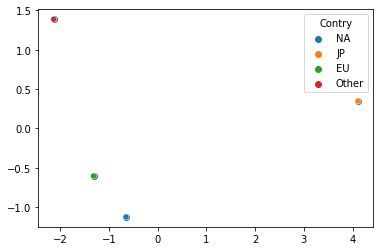

In [16]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#PCA를 통해 차원을 줄이고, 2차원 평면에 산점도를 이용해서 서로간에 어떤 상관성을 보이는지 확인

headers = ['Action','Sports','Shooter','Racing','Misc','Role-Playing','Platform']
df_PCA_list = df_PCA[headers]
scaler = StandardScaler()
Z = scaler.fit_transform(df_PCA_list)


pca = PCA(n_components= 2)
pc = pca.fit_transform(Z)
ratio = pca.explained_variance_ratio_

plt.scatter(pc[:,0],pc[:,1])
new_df = pd.DataFrame({'Contry': df_PCA['Contry'],
                       'pc1': pc[:,0],
                       'pc2': pc[:,1]
                       })

sns.scatterplot(data= new_df, x=pc[:,0], y=pc[:,1], hue='Contry')

new_df

In [17]:
#중복되는 행 찾아보기

duplicate_df = df[df.duplicated()]

In [18]:
df_duplicate = df[df.duplicated(subset='Name')]

<BarContainer object of 4 artists>

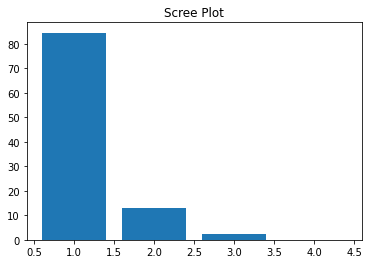

In [19]:
import numpy as np

scaler = StandardScaler()
z = scaler.fit_transform(df_PCA_list)


pca2 = PCA()
pc2 = pca2.fit_transform(z)

per_var = np.round(pca2.explained_variance_ratio_ * 100, decimals = 1)
plt.title('Scree Plot')
plt.bar(x=range(1,len(per_var)+1),height=per_var)

#이로서 pc1 pc2 로 나타내기 적합함을 알아냄




In [20]:
df_PCA[0:4]

,Contry,Action,Shooter,Sports,Racing,Platform,Misc,Role-Playing
0,NA,204,140,140,80,107,94,71
1,JP,129,30,106,41,103,88,240
2,EU,225,147,131,98,95,94,66
3,Other,224,141,162,96,73,94,74


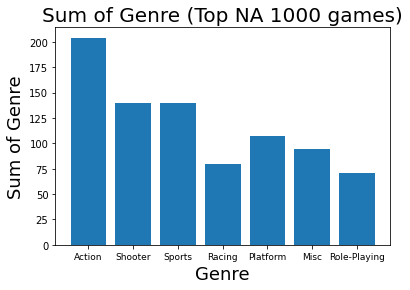

In [24]:
# 미국 장르 시각화

header = ['Action',	'Shooter'	,'Sports',	'Racing',	'Platform'	,'Misc',	'Role-Playing']
NA_list = [204,140,140,80,107,94,71]
index = header

plt.bar(index, NA_list)

plt.title('Sum of Genre (Top NA 1000 games)', fontsize=20)

plt.xlabel('Genre', fontsize=18)

plt.ylabel('Sum of Genre', fontsize=18)

plt.xticks(index,fontsize=9)

plt.show()


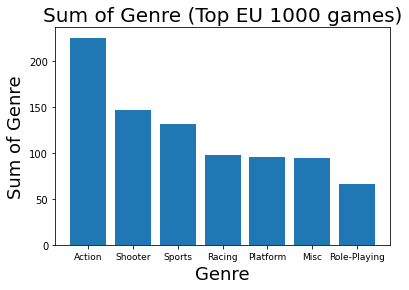

In [28]:
# 유럽 장르 시각화


EU_list = [225,	147,	131,	98,	95,	94,	66]
index = header

plt.bar(index, EU_list)

plt.title('Sum of Genre (Top EU 1000 games)', fontsize=20)

plt.xlabel('Genre', fontsize=18)

plt.ylabel('Sum of Genre', fontsize=18)

plt.xticks(index,fontsize=9)

plt.show()


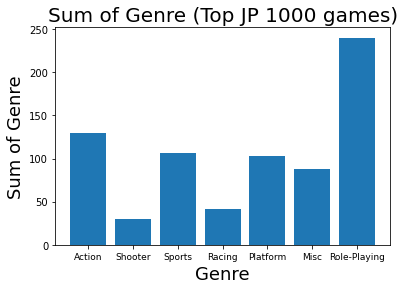

In [29]:
# 일본 장르 시각화


JP_list = [129,	30,	106,	41,	103,	88,	240]
index = header

plt.bar(index, JP_list)

plt.title('Sum of Genre (Top JP 1000 games)', fontsize=20)

plt.xlabel('Genre', fontsize=18)

plt.ylabel('Sum of Genre', fontsize=18)

plt.xticks(index,fontsize=9)

plt.show()


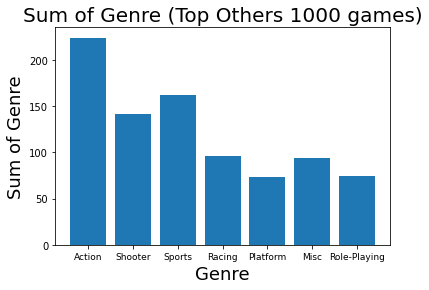

In [32]:
# Other 장르 시각화


Other_list = [224,	141,	162,	96,	73,	94,	74]
index = header

plt.bar(index, Other_list)

plt.title('Sum of Genre (Top Others 1000 games)', fontsize=20)

plt.xlabel('Genre', fontsize=18)

plt.ylabel('Sum of Genre', fontsize=18)

plt.xticks(index,fontsize=9)

plt.show()
